<a href="https://colab.research.google.com/github/khushgrover/Food-Image-Recognition/blob/master/Food_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Dataset 
Download dataset : https://www.kaggle.com/dansbecker/food-101 Kaggle

In [ ]:
import os
import tensorflow as tf

In [ ]:
print(tf.__version__)
print(tf.test.gpu_device_name())

2.3.0
/device:GPU:0


In [ ]:
mkdir -p input

In [ ]:
# %cd /content/input/food-101

Downloading the dataset

In [ ]:
# !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
# print("Dataset downloaded!")

Extracting the data

In [ ]:
!tar xzvf /content/drive/My\ Drive/food-101.tar.gz -C /content/input/
print("Extraction done!")

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/3452001.jpg
food-101/images/cannoli/

In [ ]:
os.listdir('input/food-101/images')

['poutine',
 'falafel',
 'steak',
 'churros',
 'carrot_cake',
 'filet_mignon',
 'mussels',
 'fish_and_chips',
 'eggs_benedict',
 'clam_chowder',
 'beignets',
 'pizza',
 'sushi',
 'tiramisu',
 'lobster_roll_sandwich',
 'apple_pie',
 'risotto',
 'french_fries',
 'tacos',
 'miso_soup',
 'edamame',
 'baklava',
 'bibimbap',
 'gnocchi',
 'ceviche',
 'strawberry_shortcake',
 'pho',
 'frozen_yogurt',
 'beef_tartare',
 'peking_duck',
 'nachos',
 'french_toast',
 'gyoza',
 'fried_calamari',
 'spring_rolls',
 'deviled_eggs',
 'chicken_curry',
 'greek_salad',
 'bruschetta',
 'tuna_tartare',
 'onion_rings',
 'fried_rice',
 'hamburger',
 'prime_rib',
 'hot_dog',
 'shrimp_and_grits',
 'ramen',
 'spaghetti_carbonara',
 'macarons',
 'crab_cakes',
 'pork_chop',
 'caprese_salad',
 'panna_cotta',
 'chicken_quesadilla',
 'seaweed_salad',
 'red_velvet_cake',
 'club_sandwich',
 'ice_cream',
 'chocolate_mousse',
 'croque_madame',
 'grilled_cheese_sandwich',
 'french_onion_soup',
 'takoyaki',
 'caesar_salad',


In [ ]:
os.listdir('input/food-101/meta')

['train.txt',
 'test.json',
 'classes.txt',
 'labels.txt',
 'test.txt',
 'train.json']

In [ ]:
!head input/food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


# Visualizing the Dataset

Visualizing random images from the dataset\
One image per class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

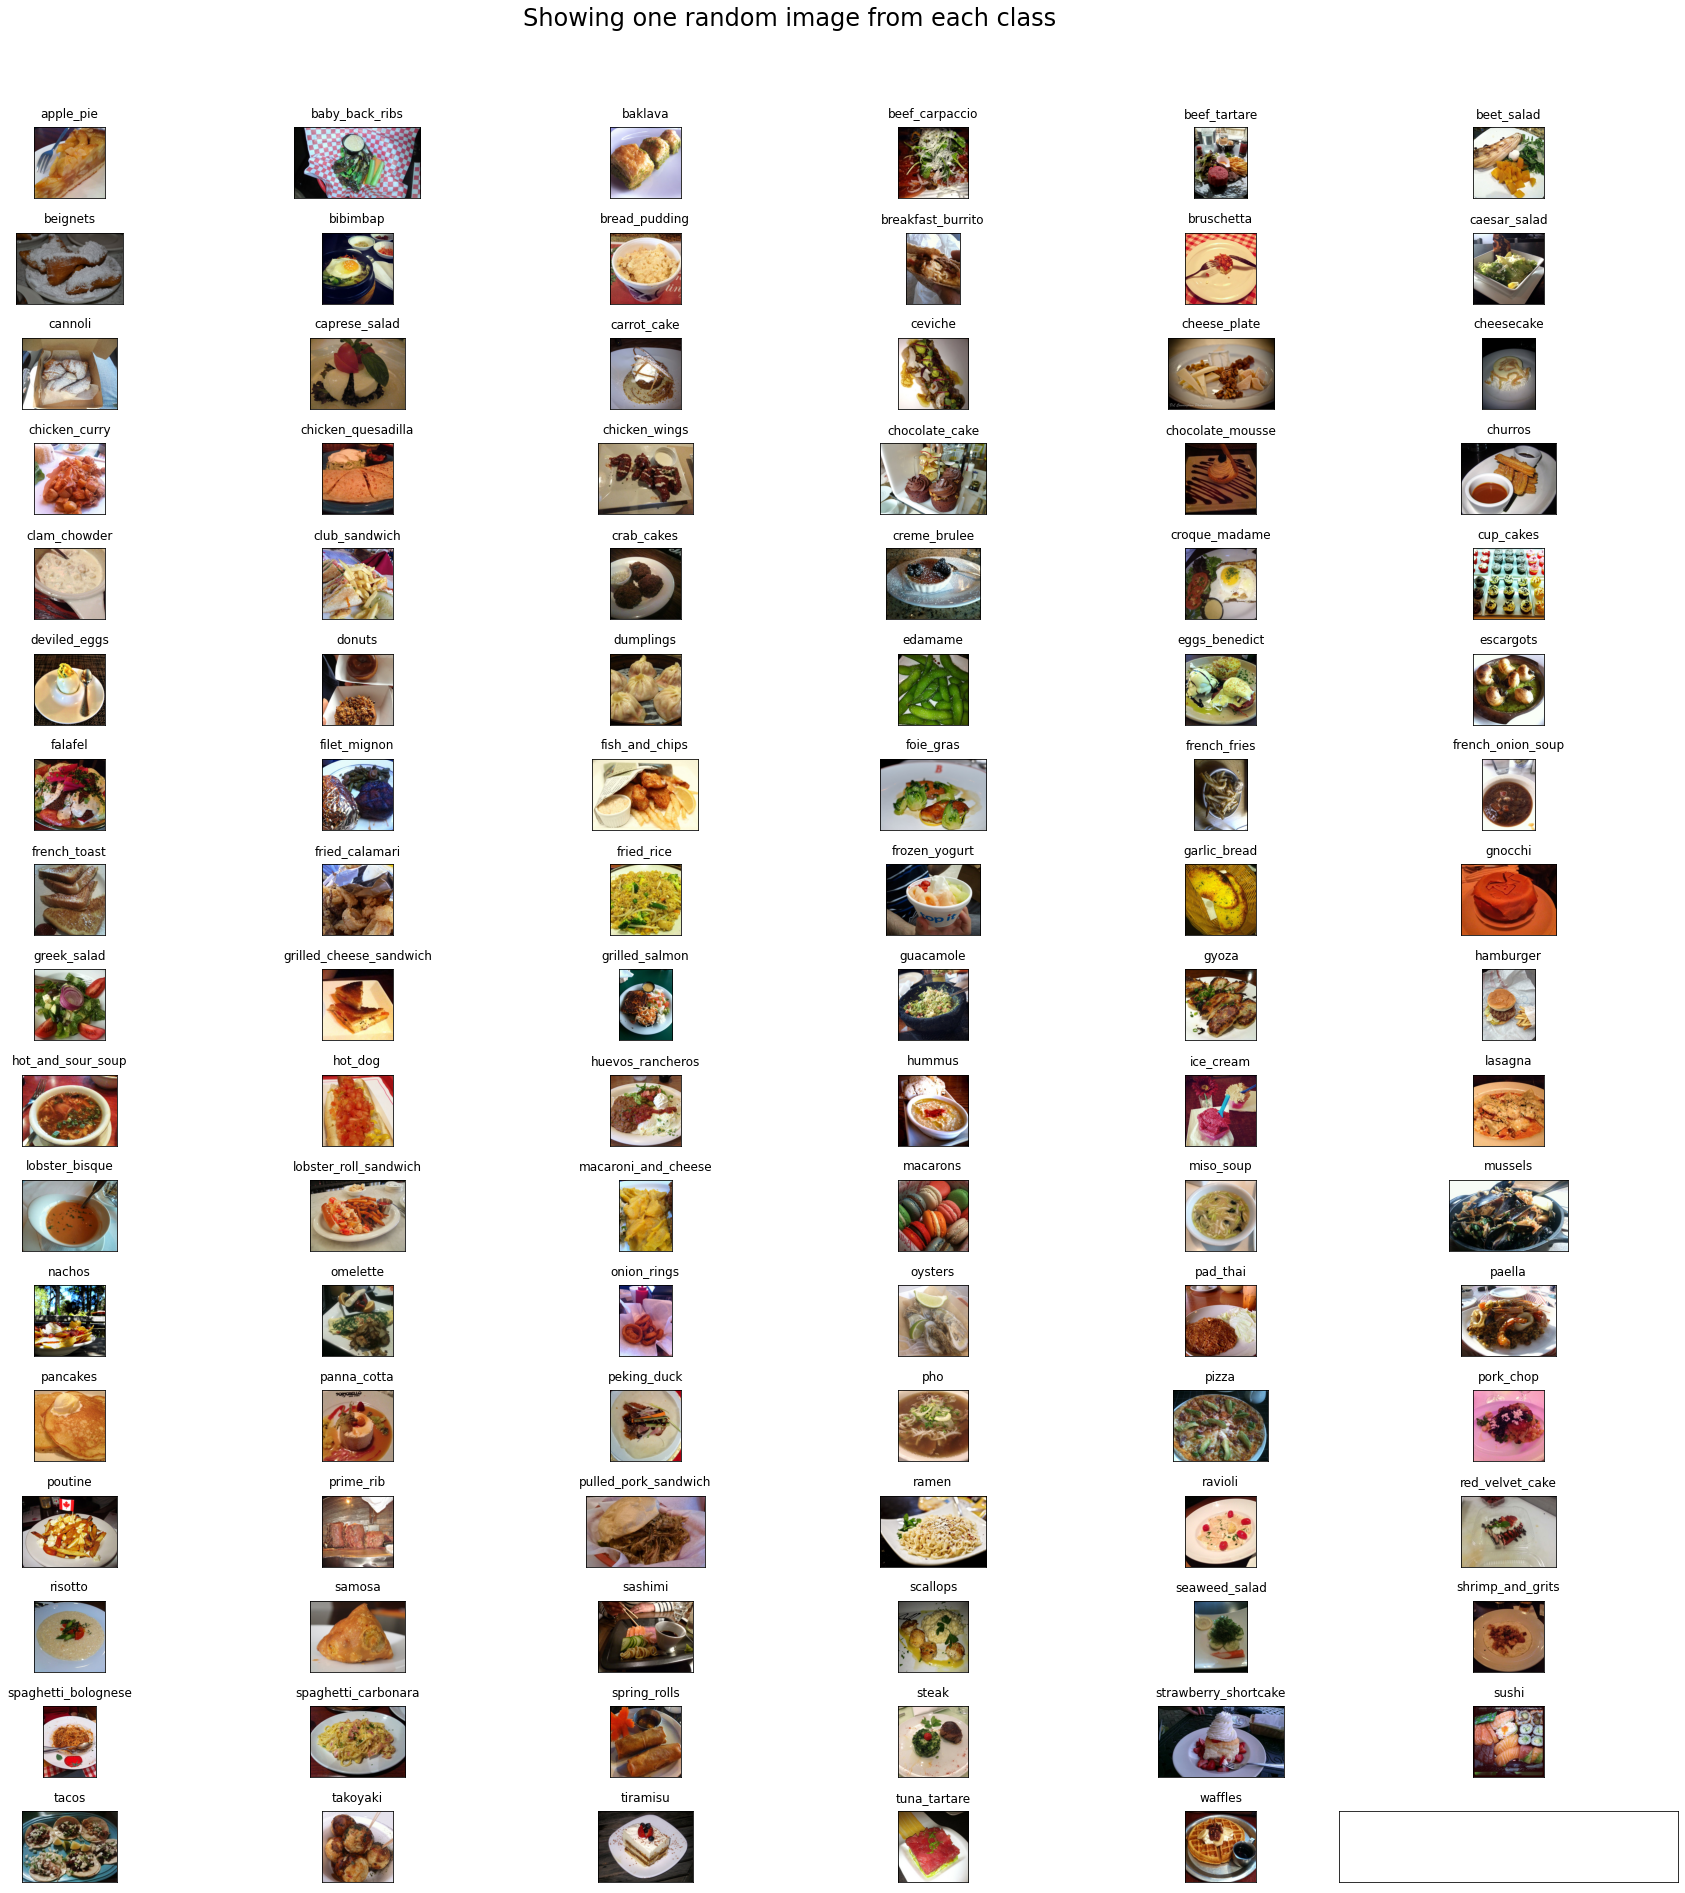

In [ ]:
ROWS = 17
COLS = 6
figure, axis = plt.subplots(ROWS, COLS, figsize = (25, 25))
figure.suptitle("Showing one random image from each class", y = 1.05, fontsize = 24)
DATA_DIR = "input/food-101/images/"
foods_sorted = sorted(os.listdir(DATA_DIR))
food_id = 0

for i in range(ROWS):
  for j in range(COLS):
    try:
      # selecting the food :
      food_selected = foods_sorted[food_id]
      # selecting a random image out of the food selected :
      food_selected_random = np.random.choice(os.listdir(os.path.join(DATA_DIR, food_selected)))
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
      continue
  
    image = plt.imread(os.path.join(DATA_DIR, food_selected, food_selected_random))
    axis[i][j].imshow(image)
    axis[i][j].set_title(food_selected, pad = 10)

plt.setp(axis, xticks=[],yticks=[])
plt.tight_layout()

# Preprocessing the Dataset

In [ ]:
from collections import defaultdict
from shutil import copy, copytree, rmtree

In [ ]:
def prepare_data(filepath, source, destination):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as text:
    paths = [line.strip() for line in text.readlines()]
    for path in paths:
      food = path.split('/')
      classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ", food)
    if not os.path.exists(os.path.join(destination, food)):
      os.makedirs(os.path.join(destination, food))
    for i in classes_images[food]:
      copy(os.path.join(source, food, i), os.path.join(destination, food, i))
  print("Copying Done!") 

In [ ]:
print("Creating train data...")
prepare_data('input/food-101/meta/train.txt', 'input/food-101/images', 'input/food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
print("Creating test data...")
prepare_data('input/food-101/meta/test.txt', 'input/food-101/images', 'input/food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [ ]:
print("Total number of samples in train folder")
!find 'input/food-101/train' -type f | wc -l

print("Total number of samples in test folder")
!find 'input/food-101/test' -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750
Total number of samples in test folder
25250


In [ ]:
# del foods_sorted[0] # remove .DS_Store from the list

In [ ]:
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

# Preprocessing the mini Dataset

Creating a mini dataset

In [ ]:
def dataset_mini(food_list, source, destination):
  if os.path.exists(destination):
    rmtree(destination)
  os.makedirs(destination)
  for food_item in food_list :
    print("Copying images into", food_item)
    copytree(os.path.join(source, food_item), os.path.join(destination, food_item))

In [ ]:
FOOD_LIST =['apple_pie', 'pizza', 'omelette']

In [ ]:
print("Creating train data folder with new classes")
dataset_mini(FOOD_LIST, 'input/food-101/train', 'input/food-101/train-mini')

print("Creating test data folder with new classes")
dataset_mini(FOOD_LIST, 'input/food-101/test', 'input/food-101/test-mini')

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [ ]:
print("Total number of samples in train folder")
!find 'input/food-101/train-mini' -type d -or -type f -printf '.' | wc -c

print("Total number of samples in test folder")
!find 'input/food-101/test-mini' -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
2250
Total number of samples in test folder
750


Fine tune Inception Pretrained model using Food 101 dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'input/food-101/train-mini'
validation_data_dir = 'input/food-101/test-mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


# Training

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

In [ ]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

In [ ]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 1.0706 - accuracy: 0.4669
Epoch 00001: val_loss improved from inf to 0.80951, saving model to best_model_3class.hdf5
140/140 [==============================] - 65s 467ms/step - loss: 1.0706 - accuracy: 0.4669 - val_loss: 0.8095 - val_accuracy: 0.7785
Epoch 2/30
140/140 [==============================] - ETA: 0s - loss: 0.8081 - accuracy: 0.7001
Epoch 00002: val_loss improved from 0.80951 to 0.61386, saving model to best_model_3class.hdf5
140/140 [==============================] - 62s 441ms/step - loss: 0.8081 - accuracy: 0.7001 - val_loss: 0.6139 - val_accuracy: 0.8220
Epoch 3/30
140/140 [==============================] - ETA: 0s - loss: 0.6513 - accuracy: 0.7739
Epoch 00003: val_loss improved from 0.61386 to 0.49398, saving model to best_model_3class.hdf5
140/140 [==============================] - 62s 441ms/step - loss: 0.6513 - accuracy: 0.

In [ ]:
class_map_3 = train_generator.class_indices
class_map_3

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5', compile = False)

# Setting compile=False and clearing the session leads to faster loading of the saved model

# Saving model in Drive

In [ ]:
path = '/content/drive/My Drive/Food Recognition/model_trained_3class'
model.save(path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/model_trained_3class/assets


In [ ]:
!cp 'history_3class.log' '/content/drive/My Drive/Food Recognition/'

In [ ]:
path = '/content/drive/My Drive/Food Recognition/best_model_3class'
model_best.save(path)

# Loading Saved Model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/Food Recognition/model_trained_3class', compile = False)

In [ ]:
import pandas as pd
log_data = pd.read_csv('/content/drive/My Drive/Food Recognition/history_3class.log', sep=',', engine='python')

In [ ]:
model_best = load_model('/content/drive/My Drive/Food Recognition/best_model_3class', compile = False)

In [ ]:
print(model_best.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

# Evaluation
Visualizing the accuracy and loss_plots

In [ ]:
log_data['accuracy'][29]

0.9753804802894592

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history, title):
  plt.title(title)
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
  plt.show()

def plot_loss(history, title):
  plt.title(title)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'validation_loss'], loc='best')
  plt.show()

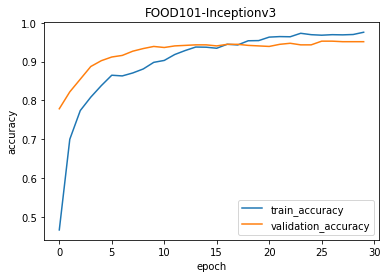

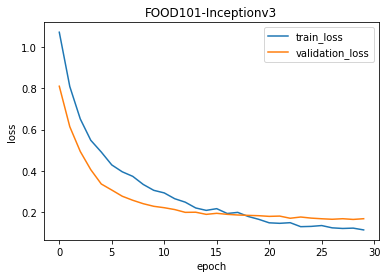

In [ ]:
plot_accuracy(log_data, 'FOOD101-Inceptionv3')
plot_loss(log_data, 'FOOD101-Inceptionv3')

# Prediction

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    FOOD_LIST.sort()
    pred_value = FOOD_LIST[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [ ]:
!wget -O applepie.jpg https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
!wget -O pizza.jpg https://www.simplyrecipes.com/wp-content/uploads/2019/09/easy-pepperoni-pizza-lead-4.jpg
!wget -O omelette.jpg https://www.seriouseats.com/2020/06/20200602-western-denver-omelette-daniel-gritzer-8.jpg

--2020-09-03 10:08:58--  https://acleanbake.com/wp-content/uploads/2017/10/Paleo-Apple-Pie-with-Crumb-Topping-gluten-free-grain-free-dairy-free-15.jpg
Resolving acleanbake.com (acleanbake.com)... 138.197.203.41
Connecting to acleanbake.com (acleanbake.com)|138.197.203.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114276 (112K) [image/jpeg]
Saving to: ‘applepie.jpg’

applepie.jpg        100%[===================>] 111.60K  --.-KB/s    in 0.1s    

2020-09-03 10:08:58 (1.08 MB/s) - ‘applepie.jpg’ saved [114276/114276]

--2020-09-03 10:08:58--  https://www.simplyrecipes.com/wp-content/uploads/2019/09/easy-pepperoni-pizza-lead-4.jpg
Resolving www.simplyrecipes.com (www.simplyrecipes.com)... 104.18.27.248, 104.18.26.248, 2606:4700::6812:1af8, ...
Connecting to www.simplyrecipes.com (www.simplyrecipes.com)|104.18.27.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376459 (368K) [image/jpeg]
Saving to: ‘pizza.jpg’

pizza.jpg          

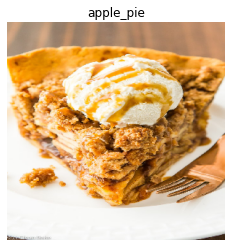

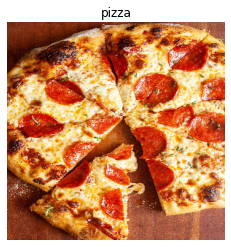

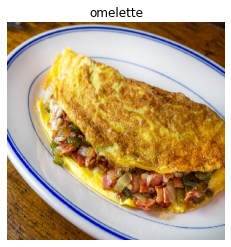

In [ ]:
images = []
images.append('applepie.jpg')
images.append('pizza.jpg')
images.append('omelette.jpg')
predict_class(model_best, images, True)